In [1]:
# 트리 시각화 도구 설치
# 1. graphviz.org에서 graphviz 도구 다운로드 및 설치
# 2. python package 설치
# !pip install graphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

bc_dataset = load_breast_cancer()

X = bc_dataset['data']
y = bc_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [4]:
#  모델 훈련 (학습)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='gini') # criterion default : gini

dtc.fit(X_train, y_train)

dtc.score(X_train, y_train), dtc.score(X_test, y_test)

(1.0, 0.9370629370629371)

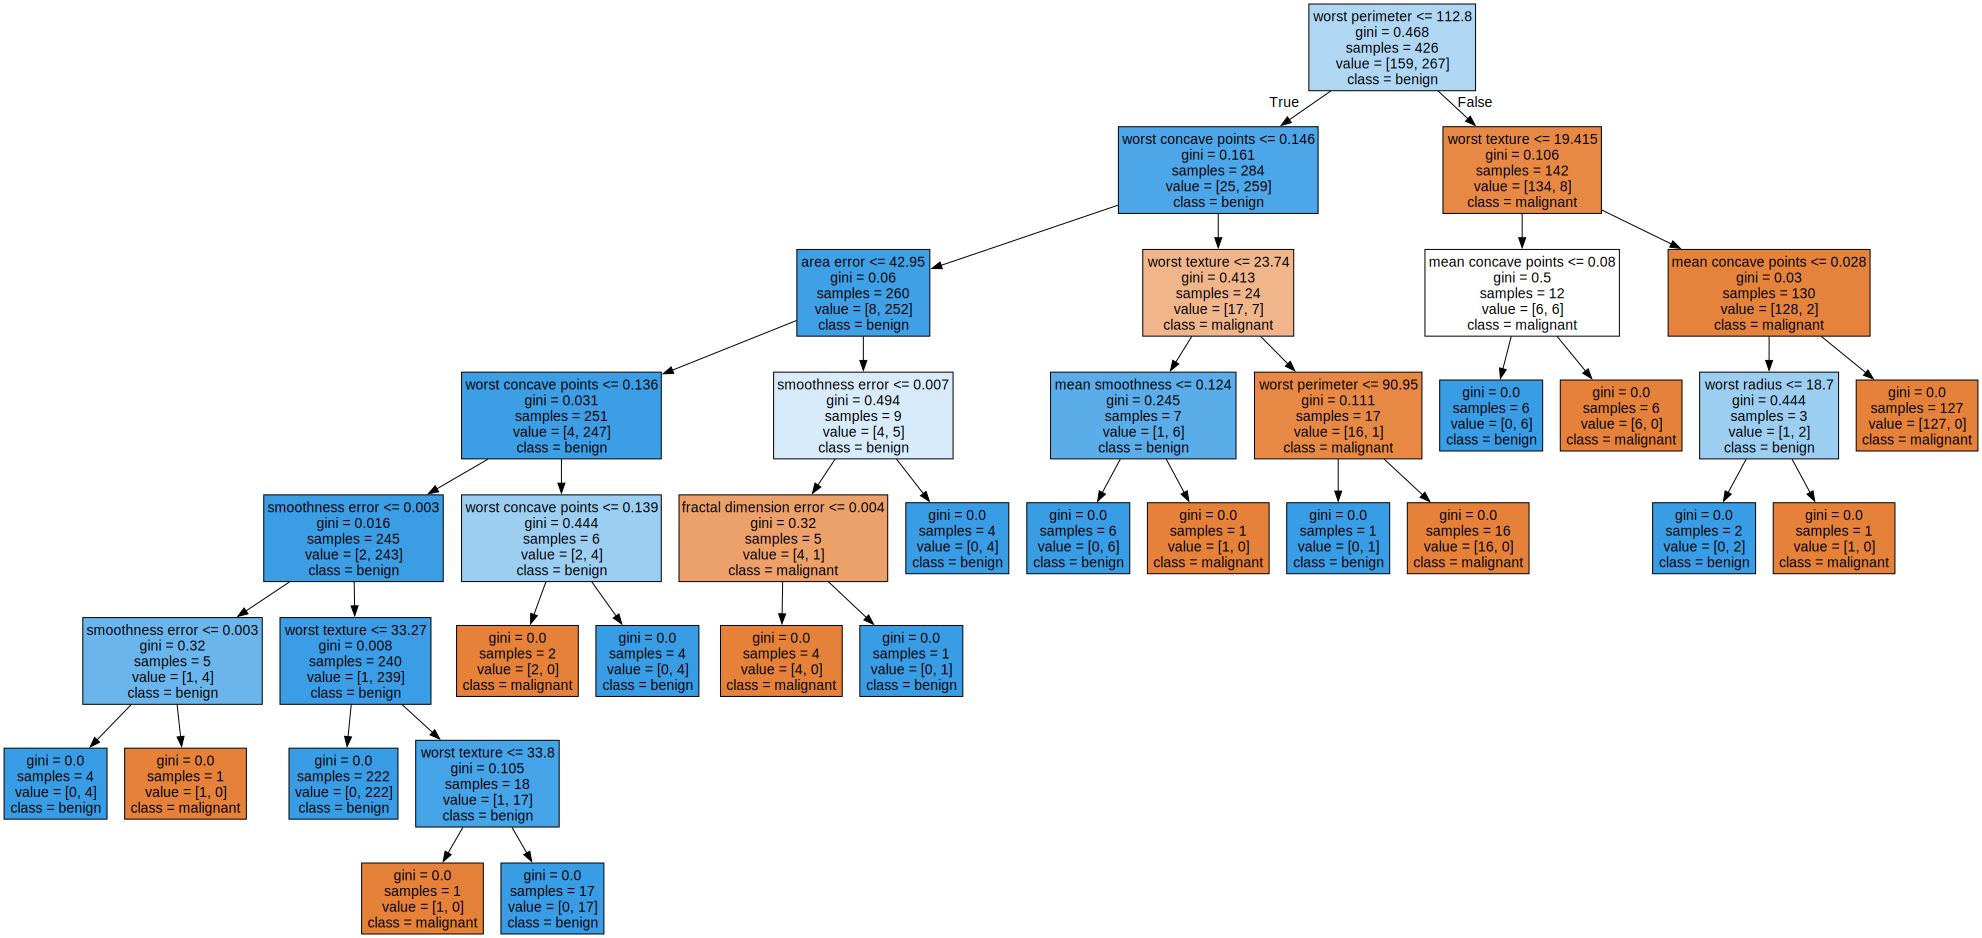

In [5]:
# 모델 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dtc, out_file="models/breast-cancer-model.dot",
                class_names=bc_dataset['target_names'],
                feature_names=bc_dataset['feature_names'],
                filled=True)

with open('models/breast-cancer-model.dot') as f:
    tree_graph_data = f.read()

graphviz.Source(tree_graph_data)